In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [31]:
# Load Data from csv file
Data = pd.read_csv("50_Startups.csv")

In [32]:
# Print first five rows of data
Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
# Statistical analysis
Data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [34]:
Data.shape

(50, 5)

In [35]:
Data.duplicated().sum()
Data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [36]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<Axes: xlabel='Profit', ylabel='Count'>

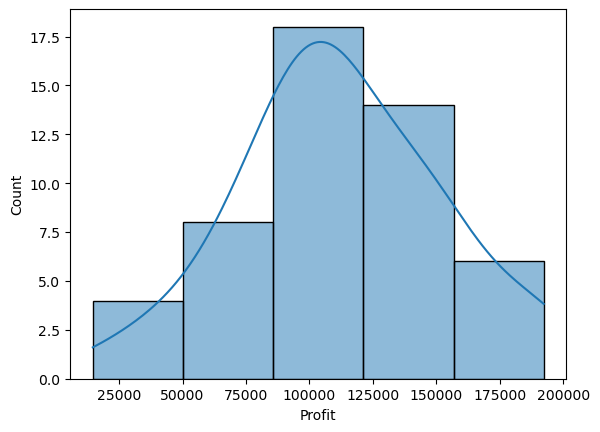

In [37]:
sns.histplot(Data['Profit'],bins=5,kde=True)

In [38]:
# Preparing data
x = Data[["R&D Spend","Administration","Marketing Spend"]]
y = Data["Profit"]
x = x.to_numpy()
y = y.to_numpy()
print(y)
y = y.reshape(-1 , 1) # Because y is one diminsion
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]
[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54]
 [105008.31]
 [103282.38]
 [101004.64]
 [ 99937.59]
 [ 97483.56]
 [ 97427.84]
 [ 96778.92]
 [ 96712.8 ]
 [ 96479.51]
 [ 90708.19]
 [ 89949.14

In [39]:
from sklearn.model_selection import train_test_split
# Random state make code donot make every time randome training
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size =0.3,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
# adding new column
# ypred.flattem() => convert from matrix to normal form
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(Data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [41]:
testing_Data_model_score = model.score(xtest,ytest)
print("Model Score/Performance on testing data", testing_Data_model_score)
training_Data_model_score = model.score(xtrain,ytrain)
print("Model Score/Performance on training data", training_Data_model_score)

Model Score/Performance on testing data 0.9418819530700165
Model Score/Performance on training data 0.9508557563847194


In [42]:
df = pd.DataFrame(data={"Predicted Value":ypred.flatten(),"Actual Value":ytest.flatten()})
print(df)

    Predicted Value  Actual Value
0     125972.148263     134307.35
1      85471.922710      81005.76
2      98924.151683      99937.59
3      46639.786287      64926.08
4     128142.124732     125370.37
5      52602.190537      35673.41
6     108364.697602     105733.54
7     100331.588469     107404.34
8      97538.566747      97427.84
9     112496.703984     122776.86
10    128110.853888     141585.52
11    173383.296181     166187.94
12     93334.036683      89949.14
13    149432.237762     152211.77
14    173293.949649     182901.99


In [43]:
# Evaluate Model
from sklearn.metrics import r2_score
r2score = r2_score(ypred,ytest)*100
print("R2 Score =", r2score )

R2 Score = 93.55141378867275


In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ypred,ytest)*100
print("Mse Score =", mse )

Mse Score = 8177214943.547152


In [45]:
rmse = np.sqrt(mean_squared_error(ypred,ytest))*100
print("Root Mse Score =", rmse )

Root Mse Score = 904279.5443637522


In [46]:
# W1 W2 W3
c= model.coef_
b = model.intercept_
print(c)
print(b)

[[ 0.80194978 -0.0881887   0.02935647]]
[56730.65493531]


In [48]:
# Make user test
print("Enter your statup company data and i will help you to predict your company profit")
x1 = np.float64(input("R&D Spend:"))
x2 = np.float64(input("Administration Spend:"))
x3 = np.float64(input("Marketing Spend:"))
# 165349.20
# 136897.80	
# 471784.10
print("Average profit =",c[0][0]*x1+c[0][1]*x2+c[0][2]*x3 + b)

Enter your statup company data and i will help you to predict your company profit
Average profit = [191109.48668313]
